In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_digits(return_X_y=True)

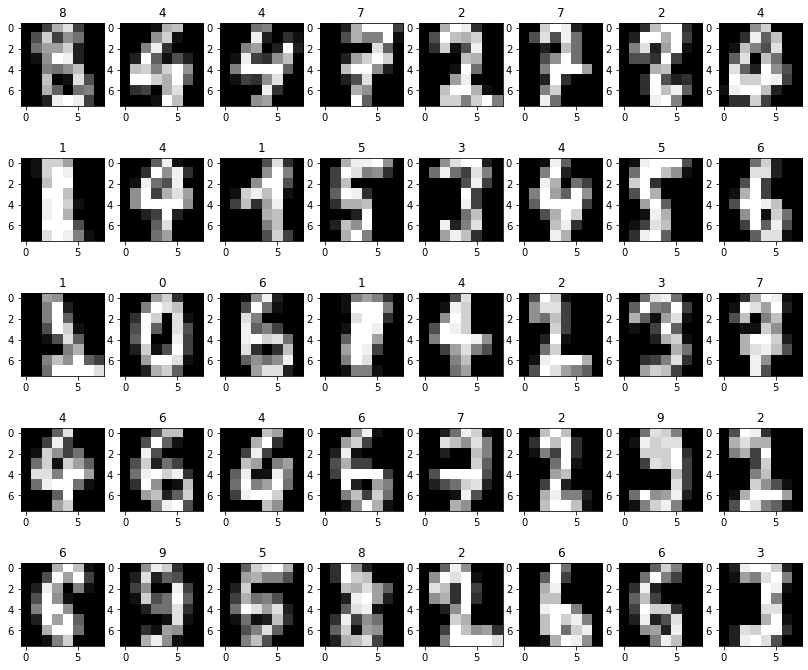

In [3]:
def draw_digit(x, label, ax, shape=(8, 8)):
    x = x.reshape(shape)
    ax.imshow(x, cmap='gray')
    ax.set_title(label)

def draw_random(data, labels, rows=5, cols=8):
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(14, 12))
    indices = np.random.choice(len(labels), size = rows * cols, replace=False)
    indices = iter(indices)
    
    for row in range(rows):
        for col in range(cols):
            i = next(indices)
            ax = axes[row][col]
            draw_digit(data[i], labels[i], ax)
    plt.show()

draw_random(X, y)

In [4]:
def write_ans(task_num, ans, verbose=True):
    print(ans)
    with open(f"task{task_num}.txt", 'w') as f:
        f.write(ans)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [6]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=10)
write_ans(1, str(scores.mean()))

0.8296896337678461


In [7]:
clf = BaggingClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=10)
write_ans(2, str(scores.mean()))

0.922042209807573


In [8]:
clf = BaggingClassifier(n_estimators=100, max_features=int(X.shape[1]**0.5))
scores = cross_val_score(clf, X, y, cv=10)
write_ans(3, str(scores.mean()))

0.9321135940409683


In [10]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features=int(X.shape[1]**0.5)),
                        n_estimators=100)
scores = cross_val_score(clf, X, y, cv=10)
write_ans(4, str(scores.mean()))

0.9488050900062073


In [13]:
scores = cross_val_score(RandomForestClassifier(), X, y, cv=10)
scores.mean()

0.9482402234636871

In [14]:
write_ans(5, "2 3 4 7")

2 3 4 7
